# Benötigte imports

In [34]:
import keras as keras
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D
from keras.models import clone_model
from readData import readData
import matplotlib.ticker as ticker

from plotDigits import predictAndPlot, plotDigit

import matplotlib.pyplot as plt

# Erstellung des Modells

In [26]:
# initialisierung des Modells
untrained_model = Sequential()
untrained_model.add(Dense(600, activation='relu', input_shape=(784, ),name = "first_layer"))
untrained_model.add(Dense(400, activation='relu',  name = "hidden_layer_1"))
untrained_model.add(Dense(100, activation='relu',  name = "hidden_layer_2"))
untrained_model.add(Dense(10, activation = 'softmax', name = "output_layer"))

/Users/moritzschroer/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Erstelltes Modell kompilieren

In [101]:
# kompilieren des Modells
model = clone_model(untrained_model)
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Einlesen der Trainingsdaten

In [ ]:
import random
from keras.datasets import mnist
import sys

# Diese Methode ließt eine Anzahl von train_size Handgeschriebenen Ziffern zum Training und eine Anzahl von
# test_size Hangeschriebenen Ziffern zum Testen aus dem  mnist dataset in arrays und gibt die arrays zurück

def readData(train_size, test_size):
    # Lade den MNIST-Datensatz
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # Überprüfe, ob train_size oder test_size nicht größer als die Anzahl der Datensätze ist
    if train_size > len(x_train) :
        print("Fehler: train_size überschreitet Datenmenge von "+str(len(x_train)))
        sys.exit() 
    if test_size > len(x_test) :
        print("Fehler: test_size überschreitet Datenmenge von "+str(len(x_test)))
        sys.exit() 

    # Wähle zufällige Indizes für Trainingsdaten
    train_indices = random.sample(range(len(x_train)), train_size)
    # Wähle zufällige Indizes für Testdaten
    test_indices = random.sample(range(len(x_test)), test_size)
    
    # Extrahiere die ausgewählten Trainingsdaten und Testdaten
    train_data = x_train[train_indices].reshape(train_size, -1) / 255.0
    verify_train_data = y_train[train_indices]
    test_data = x_test[test_indices].reshape(test_size, -1) / 255.0
    verify_test_data = y_test[test_indices]

    return train_data, verify_train_data, test_data, verify_test_data

In [23]:
# Einlesen der Trainingsdaten und Testdaten
train_length = 60000
test_length = 10000
train_data, training_verification_data, test_data, test_verificarion_data = readData(train_length, test_length)

# Training des Modells

In [5]:
# Trainieren des Modells
model.fit(train_data, training_verification_data, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8638 - loss: 0.4574 - val_accuracy: 0.9611 - val_loss: 0.1287
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9720 - loss: 0.0902 - val_accuracy: 0.9715 - val_loss: 0.0943
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9829 - loss: 0.0546 - val_accuracy: 0.9747 - val_loss: 0.0876
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9888 - loss: 0.0354 - val_accuracy: 0.9762 - val_loss: 0.0831
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9901 - loss: 0.0327 - val_accuracy: 0.9779 - val_loss: 0.0858
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9786 - val_loss: 0.0842
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9932 - loss: 0.0198 - val_accuracy: 0.9732 - val_loss: 0.1070
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9950 - loss: 0.0160 - val_accu

# Testen und plotten

In [44]:
# Testen des Modells
test_loss, test_acc = model.evaluate(test_data, test_verificarion_data)
print('Test accuracy:', test_acc, "\nTest loss: ",test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.0847
Test accuracy: 0.9804999828338623 
Test loss:  0.09529513120651245


In [65]:
# Konvertiert das 1D-Array in ein 2D-Array, das zum Plotten der Ziffer verwendet wird.
def to2DArray(vektor):
    matrix = np.zeros((28,28))
    for i in range(28):
        for j in range(28):
            matrix[i, j] = vektor[i*28 + j]
            
    return matrix
    
# Plottet die Ziffer.
def plotDigit(bilddaten, verifizierungsdaten, geratene_ziffer, confidence):
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))

    for i in range(3):
        for j in range(3):
            axs[i, j].imshow(to2DArray(bilddaten[i*3 + j]), cmap='gray', interpolation='none')
            axs[i, j].set_title("prediction: "+str(geratene_ziffer[3*i + j])+ ", confidence: " +str(round(confidence[3*i+j],3)))
    plt.tight_layout()
    plt.show()

# Vorhersage von 9 zufällig ausgewählten Zahlen aus dem Testdatensatz mit dem Modell 
# und Plotten der Ziffern.
def predictAndPlot(modell, testdaten, test_verifikationsdaten):
    ziffern_verfügbar = range(len(testdaten))
    ziffern_zum_plotten = np.random.choice(ziffern_verfügbar, size = 9, replace=False)
    
    bilddaten, verifizierungsdaten, geratene_ziffer, confidence = [], [], [], []
        
    for j in range(9):
        vorhersage = modell.predict(np.array([testdaten[ziffern_zum_plotten[j]]]))
        bilddaten.append(testdaten[ziffern_zum_plotten[j]])
        verifizierungsdaten.append(test_verifikationsdaten[ziffern_zum_plotten[j]])
        geratene_ziffer.append(np.argmax(vorhersage))
        confidence.append(np.max(vorhersage))
        
        
    plotDigit(bilddaten, verifizierungsdaten, geratene_ziffer, confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


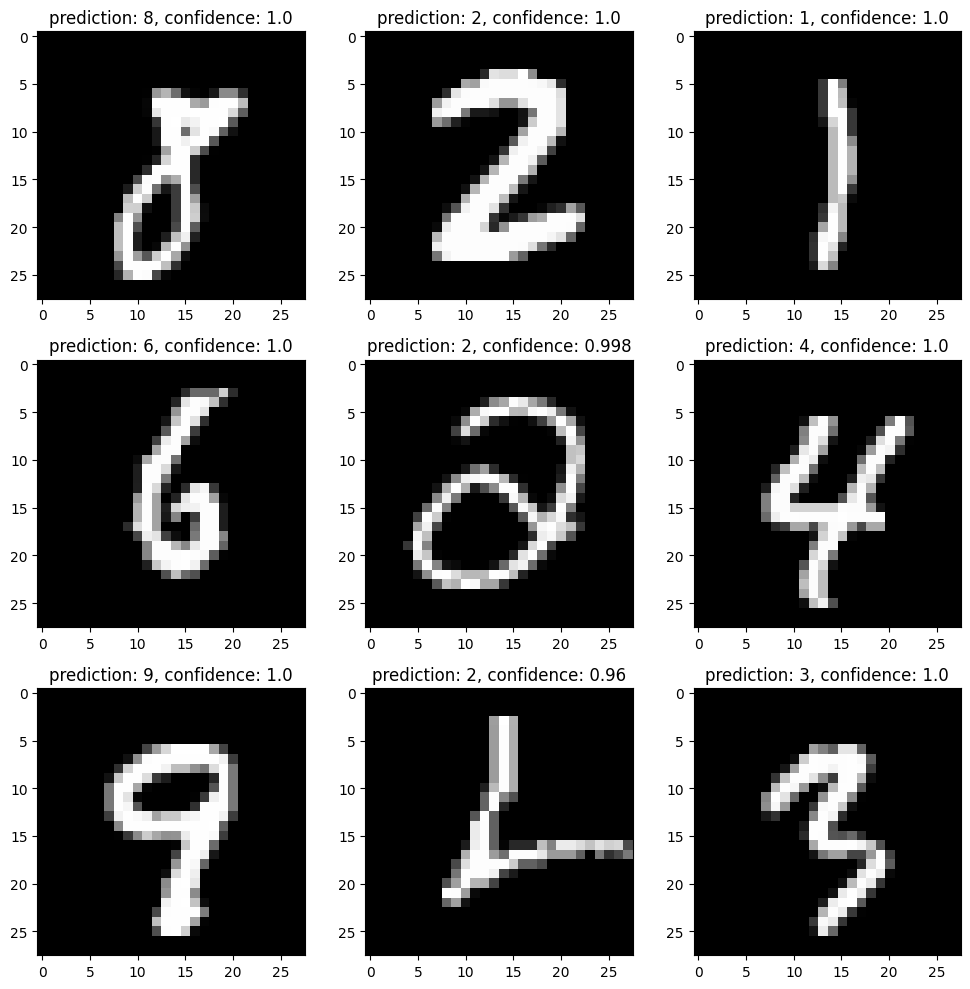

In [68]:
# Plotten einiger vom Modell vorhergesagten Ziffern 
predictAndPlot(model, test_data, test_verificarion_data)

In [74]:
# importiere callback Klasse um benutzerdefinierte Aktionen während des Trainings des Modells durchführen zu können
from keras.callbacks import Callback

# erstelle Klasse mit benutzerdefinierten Aktionen, die während des trainings ausgeführt werden sollen
class TrainMetricsCallback(Callback):
    def __init__(self, x_test=None, y_test=None):
        super(TrainMetricsCallback, self).__init__()
        # listen zum speichern der accuracy und losses auf dem Test und dem Trainingsdatenset nach jeder epoch
        self.train_losses = []
        self.train_accuracies = []
        self.test_losses = []
        self.test_accuracies = []
        self.x_test = x_test
        self.y_test = y_test

    # Am ende der epoch füge die accuracy und loss werte zu den Listen hinzu
    def on_epoch_end(self, epoch, logs=None):
        self.train_losses.append(logs.get('loss'))
        self.train_accuracies.append(logs.get('accuracy'))
        
        if self.x_test is not None and self.y_test is not None:
            # Auswerten der modells für das Trainigsdatenset
            loss, accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
            self.test_losses.append(loss)
            self.test_accuracies.append(accuracy)


In [75]:
# Methode um nach jdem Trainingsschritt die accuracy und loss sowohl auf dem Testdatenset als auch
# auf den Trainingsdatenset als Liste zurückzugeben
def train_and_get_metrics(model, x_train, y_train, x_test=None, y_test=None, epochs=1, batch_size = 128):
    train_metrics_callback = TrainMetricsCallback(x_test, y_test)
    model.fit(x_train, y_train, epochs=epochs, callbacks=[train_metrics_callback],  batch_size=batch_size)
    
    # geben die accuracies und losses für die Test und Trainingsdaten zurück
    return train_metrics_callback.train_losses, train_metrics_callback.train_accuracies, \
           train_metrics_callback.test_losses, train_metrics_callback.test_accuracies

In [88]:
# Einlesen von weniger Trainingsdaten und Testdaten zum visualisieren des lernprozesses
train_length = 2500
test_length = 10000
train_data, training_verification_data, test_data, test_verificarion_data = readData(train_length, test_length)

In [102]:
model = clone_model(untrained_model)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# trainiere das modell und erhalte listen mit den accuracy erten und loss werten für das test und trainingsdatenset nach jeder epoch
no_epochs = 20
train_losses, train_accuracies, test_losses, test_accuracies = train_and_get_metrics(model, train_data, training_verification_data, test_data, test_verificarion_data,  epochs=no_epochs,  batch_size=128)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.2562 - loss: 2.0111
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5301 - loss: 1.2665
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6817 - loss: 0.9151
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7650 - loss: 0.7267
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8486 - loss: 0.5815
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9041 - loss: 0.4289
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9291 - loss: 0.3220
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9434 - loss: 0.2391
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9640 - loss: 0.1897
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9677 - loss: 0.1535
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9743 - loss: 0.1348
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy:

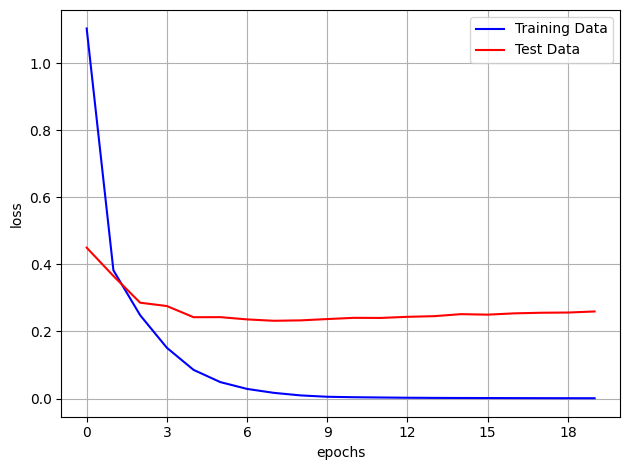

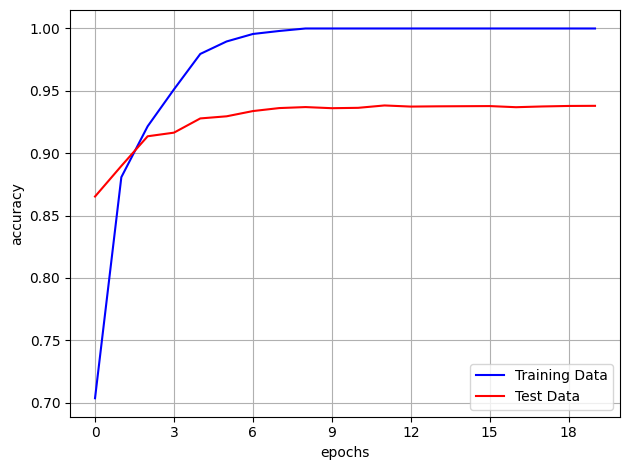

In [91]:
# plotten
epochs = np.arange(no_epochs)
plt.plot(epochs, train_losses, label = 'Training Data', color ='blue')
plt.plot(epochs, test_losses, label = 'Test Data', color ='red')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(epochs, train_accuracies, label = 'Training Data', color ='blue')
plt.plot(epochs, test_accuracies, label = 'Test Data', color ='red')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [98]:
# initialisierung des Modells
untrained_model = Sequential()
untrained_model.add(Dense(600, activation='relu', input_shape=(784, ),name = "first_layer"))
untrained_model.add(Dense(10, activation='relu',  name = "hidden_layer_1"))
untrained_model.add(Dense(10, activation = 'softmax', name = "output_layer"))

In [99]:
model = clone_model(untrained_model)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# trainiere das modell und erhalte listen mit den accuracy erten und loss werten für das test und trainingsdatenset nach jeder epoch
no_epochs = 20
train_losses, train_accuracies, test_losses, test_accuracies = train_and_get_metrics(model, train_data, training_verification_data, test_data, test_verificarion_data,  epochs=no_epochs,  batch_size=128)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.2406 - loss: 1.9745
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6106 - loss: 1.3367
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7037 - loss: 1.0315
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7500 - loss: 0.8676
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7828 - loss: 0.6954
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8115 - loss: 0.5694
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8826 - loss: 0.4445
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9399 - loss: 0.3006
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9530 - loss: 0.2197
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9627 - loss: 0.1853
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9715 - loss: 0.1383
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy:

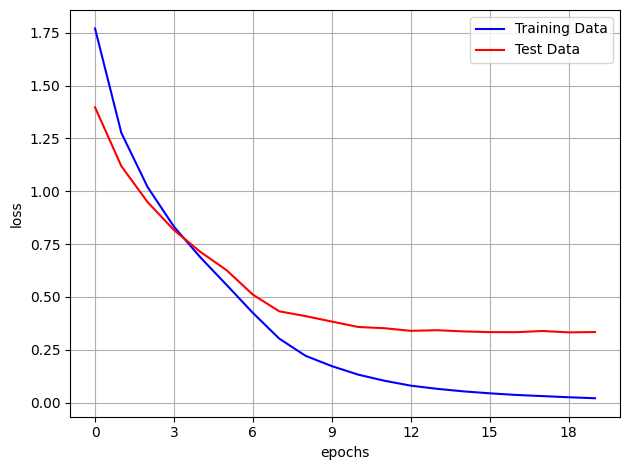

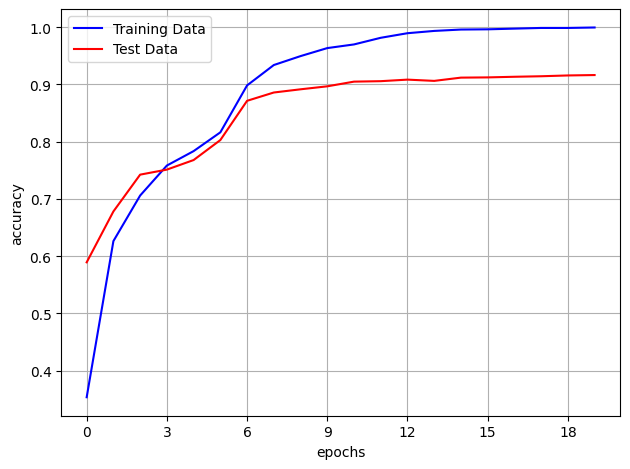

In [100]:
# plotten
epochs = np.arange(no_epochs)
plt.plot(epochs, train_losses, label = 'Training Data', color ='blue')
plt.plot(epochs, test_losses, label = 'Test Data', color ='red')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(epochs, train_accuracies, label = 'Training Data', color ='blue')
plt.plot(epochs, test_accuracies, label = 'Test Data', color ='red')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()